**Load & Preprocess Dataset**

In [10]:
from tensorflow.keras.utils import to_categorical

# Reload dataset to avoid duplicate encodings
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# One-hot encode labels (only ONCE!)
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)  # should be (50000, 10)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)    # should be (10000, 10)





x_train: (50000, 32, 32, 3)
y_train: (50000, 10)
x_test: (10000, 32, 32, 3)
y_test: (10000, 10)


**Build CNN Model**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Build the model
model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# Fully connected
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10 classes

# Show model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

**Compile & Train (30 epochs target, with safety nets)**

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 2. Data Augmentation (to reduce overfitting)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# 3. Callbacks
checkpoint = ModelCheckpoint(
    'best_cifar10_model.h5', monitor='val_accuracy',
    save_best_only=True, mode='max', verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy', patience=7,
    restore_best_weights=True, verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5,
    patience=3, min_lr=1e-6, verbose=1
)

callbacks = [checkpoint, early_stop, reduce_lr]

# 4. Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
    verbose=2
)


Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.43680, saving model to best_cifar10_model.h5


782/782 - 52s - 66ms/step - accuracy: 0.3321 - loss: 1.8151 - val_accuracy: 0.4368 - val_loss: 1.6293 - learning_rate: 1.0000e-03
Epoch 2/30

Epoch 2: val_accuracy improved from 0.43680 to 0.49730, saving model to best_cifar10_model.h5


782/782 - 32s - 40ms/step - accuracy: 0.4647 - loss: 1.4728 - val_accuracy: 0.4973 - val_loss: 1.5222 - learning_rate: 1.0000e-03
Epoch 3/30

Epoch 3: val_accuracy improved from 0.49730 to 0.56450, saving model to best_cifar10_model.h5


782/782 - 31s - 39ms/step - accuracy: 0.5389 - loss: 1.2930 - val_accuracy: 0.5645 - val_loss: 1.2878 - learning_rate: 1.0000e-03
Epoch 4/30

Epoch 4: val_accuracy improved from 0.56450 to 0.63220, saving model to best_cifar10_model.h5


782/782 - 41s - 53ms/step - accuracy: 0.5969 - loss: 1.1570 - val_accuracy: 0.6322 - val_loss: 1.0854 - learning_rate: 1.0000e-03
Epoch 5/30

Epoch 5: val_accuracy improved from 0.63220 to 0.66980, saving model to best_cifar10_model.h5


782/782 - 30s - 39ms/step - accuracy: 0.6346 - loss: 1.0603 - val_accuracy: 0.6698 - val_loss: 0.9962 - learning_rate: 1.0000e-03
Epoch 6/30

Epoch 6: val_accuracy improved from 0.66980 to 0.67170, saving model to best_cifar10_model.h5


782/782 - 31s - 39ms/step - accuracy: 0.6623 - loss: 0.9932 - val_accuracy: 0.6717 - val_loss: 0.9762 - learning_rate: 1.0000e-03
Epoch 7/30

Epoch 7: val_accuracy improved from 0.67170 to 0.71580, saving model to best_cifar10_model.h5


782/782 - 31s - 39ms/step - accuracy: 0.6872 - loss: 0.9316 - val_accuracy: 0.7158 - val_loss: 0.8521 - learning_rate: 1.0000e-03
Epoch 8/30

Epoch 8: val_accuracy improved from 0.71580 to 0.72290, saving model to best_cifar10_model.h5


782/782 - 30s - 39ms/step - accuracy: 0.7015 - loss: 0.8871 - val_accuracy: 0.7229 - val_loss: 0.8522 - learning_rate: 1.0000e-03
Epoch 9/30

Epoch 9: val_accuracy improved from 0.72290 to 0.74420, saving model to best_cifar10_model.h5


782/782 - 30s - 38ms/step - accuracy: 0.7192 - loss: 0.8412 - val_accuracy: 0.7442 - val_loss: 0.7623 - learning_rate: 1.0000e-03
Epoch 10/30

Epoch 10: val_accuracy did not improve from 0.74420
782/782 - 30s - 38ms/step - accuracy: 0.7322 - loss: 0.8088 - val_accuracy: 0.7041 - val_loss: 0.9072 - learning_rate: 1.0000e-03
Epoch 11/30

Epoch 11: val_accuracy improved from 0.74420 to 0.78390, saving model to best_cifar10_model.h5


782/782 - 41s - 52ms/step - accuracy: 0.7409 - loss: 0.7749 - val_accuracy: 0.7839 - val_loss: 0.6445 - learning_rate: 1.0000e-03
Epoch 12/30

Epoch 12: val_accuracy did not improve from 0.78390
782/782 - 29s - 37ms/step - accuracy: 0.7515 - loss: 0.7477 - val_accuracy: 0.7650 - val_loss: 0.7102 - learning_rate: 1.0000e-03
Epoch 13/30

Epoch 13: val_accuracy did not improve from 0.78390
782/782 - 43s - 55ms/step - accuracy: 0.7619 - loss: 0.7223 - val_accuracy: 0.7789 - val_loss: 0.6650 - learning_rate: 1.0000e-03
Epoch 14/30

Epoch 14: val_accuracy improved from 0.78390 to 0.79050, saving model to best_cifar10_model.h5



Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
782/782 - 30s - 38ms/step - accuracy: 0.7703 - loss: 0.6985 - val_accuracy: 0.7905 - val_loss: 0.6565 - learning_rate: 1.0000e-03
Epoch 15/30

Epoch 15: val_accuracy improved from 0.79050 to 0.81210, saving model to best_cifar10_model.h5


782/782 - 30s - 38ms/step - accuracy: 0.7897 - loss: 0.6320 - val_accuracy: 0.8121 - val_loss: 0.5586 - learning_rate: 5.0000e-04
Epoch 16/30

Epoch 16: val_accuracy improved from 0.81210 to 0.82530, saving model to best_cifar10_model.h5


782/782 - 29s - 37ms/step - accuracy: 0.7955 - loss: 0.6181 - val_accuracy: 0.8253 - val_loss: 0.5230 - learning_rate: 5.0000e-04
Epoch 17/30

Epoch 17: val_accuracy did not improve from 0.82530
782/782 - 30s - 39ms/step - accuracy: 0.8005 - loss: 0.6002 - val_accuracy: 0.8067 - val_loss: 0.5676 - learning_rate: 5.0000e-04
Epoch 18/30

Epoch 18: val_accuracy did not improve from 0.82530
782/782 - 30s - 38ms/step - accuracy: 0.8067 - loss: 0.5810 - val_accuracy: 0.8149 - val_loss: 0.5546 - learning_rate: 5.0000e-04
Epoch 19/30

Epoch 19: val_accuracy did not improve from 0.82530

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
782/782 - 30s - 39ms/step - accuracy: 0.8068 - loss: 0.5794 - val_accuracy: 0.8098 - val_loss: 0.5666 - learning_rate: 5.0000e-04
Epoch 20/30

Epoch 20: val_accuracy improved from 0.82530 to 0.83960, saving model to best_cifar10_model.h5


782/782 - 31s - 40ms/step - accuracy: 0.8162 - loss: 0.5469 - val_accuracy: 0.8396 - val_loss: 0.4795 - learning_rate: 2.5000e-04
Epoch 21/30

Epoch 21: val_accuracy did not improve from 0.83960
782/782 - 31s - 39ms/step - accuracy: 0.8199 - loss: 0.5332 - val_accuracy: 0.8324 - val_loss: 0.5032 - learning_rate: 2.5000e-04
Epoch 22/30

Epoch 22: val_accuracy did not improve from 0.83960
782/782 - 30s - 38ms/step - accuracy: 0.8261 - loss: 0.5283 - val_accuracy: 0.8348 - val_loss: 0.4912 - learning_rate: 2.5000e-04
Epoch 23/30

Epoch 23: val_accuracy did not improve from 0.83960

Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
782/782 - 30s - 38ms/step - accuracy: 0.8247 - loss: 0.5185 - val_accuracy: 0.8349 - val_loss: 0.4987 - learning_rate: 2.5000e-04
Epoch 24/30

Epoch 24: val_accuracy improved from 0.83960 to 0.84820, saving model to best_cifar10_model.h5


782/782 - 31s - 40ms/step - accuracy: 0.8306 - loss: 0.5044 - val_accuracy: 0.8482 - val_loss: 0.4543 - learning_rate: 1.2500e-04
Epoch 25/30

Epoch 25: val_accuracy did not improve from 0.84820
782/782 - 30s - 39ms/step - accuracy: 0.8337 - loss: 0.4964 - val_accuracy: 0.8426 - val_loss: 0.4667 - learning_rate: 1.2500e-04
Epoch 26/30

Epoch 26: val_accuracy did not improve from 0.84820
782/782 - 31s - 39ms/step - accuracy: 0.8341 - loss: 0.4966 - val_accuracy: 0.8474 - val_loss: 0.4642 - learning_rate: 1.2500e-04
Epoch 27/30

Epoch 27: val_accuracy did not improve from 0.84820

Epoch 27: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
782/782 - 29s - 38ms/step - accuracy: 0.8340 - loss: 0.4910 - val_accuracy: 0.8318 - val_loss: 0.5221 - learning_rate: 1.2500e-04
Epoch 28/30

Epoch 28: val_accuracy did not improve from 0.84820
782/782 - 30s - 39ms/step - accuracy: 0.8379 - loss: 0.4838 - val_accuracy: 0.8476 - val_loss: 0.4662 - learning_rate: 6.2500e-05
Epoch 29/30




Epoch 30: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
782/782 - 31s - 39ms/step - accuracy: 0.8363 - loss: 0.4808 - val_accuracy: 0.8483 - val_loss: 0.4558 - learning_rate: 6.2500e-05
Restoring model weights from the end of the best epoch: 30.


**Evaluate & Test**

In [12]:
# Step 5: Evaluate the model
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model('best_cifar10_model.h5')

# Evaluate on test set
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


313/313 - 3s - 10ms/step - accuracy: 0.8483 - loss: 0.4558
✅ Test Accuracy: 0.8482999801635742
✅ Test Loss: 0.45581182837486267


**Visualize Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


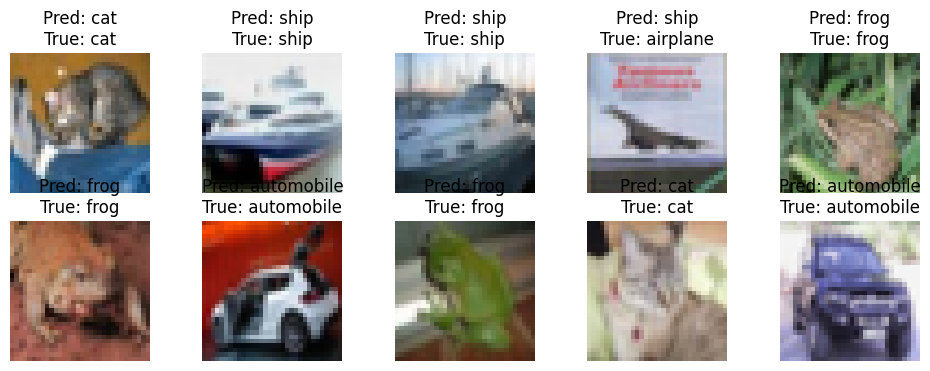

In [13]:
import numpy as np
import matplotlib.pyplot as plt
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Predict on first 10 test images
predictions = best_model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

# Plot
plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}")
    plt.axis('off')
plt.show()


**Confusion Matrix**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict all test samples
y_pred = best_model.predict(x_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("CIFAR-10 Confusion Matrix")
plt.show()

# Classification Report (precision, recall, f1)
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))


**Export**

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model('best_cifar10_model.h5')
best_model.save('best_cifar10_model.keras')
print("Saved: best_cifar10_model.keras")


# Save Training Curves

import matplotlib.pyplot as plt

# Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy vs Epochs'); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.tight_layout(); plt.savefig('accuracy_curve.png', dpi=150); plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss vs Epochs'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.tight_layout(); plt.savefig('loss_curve.png', dpi=150); plt.show()




**Sample Predictions**

TypeError: only integer scalar arrays can be converted to a scalar index

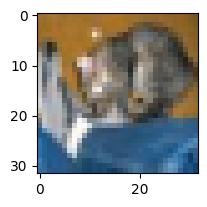

In [19]:
import os
import matplotlib.pyplot as plt

os.makedirs('sample_predictions', exist_ok=True)

rows, cols = 2, 5
plt.figure(figsize=(12, 5))
for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(x_test[i])
    pred_label = class_names[y_pred[i]]
    true_label = class_names[y_true[i]]
    title = f"Pred: {pred_label}\nTrue: {true_label}"
    plt.title(title, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.savefig('sample_predictions/grid_10.png', dpi=150)
plt.show()

print("Saved sample grid to sample_predictions/grid_10.png")

